<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Ackley-Function" data-toc-modified-id="The-Ackley-Function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Ackley Function</a></span></li><li><span><a href="#Selection" data-toc-modified-id="Selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Selection</a></span><ul class="toc-item"><li><span><a href="#Iterative-Design" data-toc-modified-id="Iterative-Design-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Iterative Design</a></span></li></ul></li><li><span><a href="#Genetics" data-toc-modified-id="Genetics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Genetics</a></span></li><li><span><a href="#Cross-Over" data-toc-modified-id="Cross-Over-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cross-Over</a></span></li><li><span><a href="#Mutation" data-toc-modified-id="Mutation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mutation</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Simulation-Run-with-Plotting" data-toc-modified-id="Simulation-Run-with-Plotting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Simulation Run with Plotting</a></span></li><li><span><a href="#Multiple-Simulation-Runs-with-Statistical-Evaluation" data-toc-modified-id="Multiple-Simulation-Runs-with-Statistical-Evaluation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Multiple Simulation Runs with Statistical Evaluation</a></span></li></ul></li><li><span><a href="#Documentation" data-toc-modified-id="Documentation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Documentation</a></span></li></ul></div>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
import random

We use for this example the following specific parameters: the dimension (N=2) and the range of the domain (R=1). In this example N is hard coded, however we can run experiments by changing the range R.

In [3]:
N=2
R=5.0

# The Ackley Function

The [Ackley function](https://en.wikipedia.org/wiki/Ackley_function) 
$e+20-20e^{-0.2\sqrt{\frac{x^2+y^2}{2}}}-e^{\frac{\cos 2\pi x + \cos 2\pi y}{2}}$
was proposed in 1987 by David Ackley in his 
[PhD Thesis](https://link.springer.com/book/10.1007%2F978-1-4613-1997-9). It is a typical test function for optimization problems with a global minimum of 0 at (0,0):

In [4]:
π=math.pi
def f(x,y):
    return 20+np.e- \
            20*np.exp(-0.2*np.sqrt((x**2+y**2)/2))- \
            np.exp((np.cos(2*π*x)+np.cos(2*π*y))/2)

In [5]:
def plot(r=R, population=None, parents=None, children=None, title=None):
    xmin, xmax = -r, +r
    ymin, ymax = -r, +r
    xs = np.linspace(xmin, xmax, 500)
    ys = np.linspace(ymin, ymax, 500)
    xx, yy = np.meshgrid(xs, ys)
    z=f(xx, yy)
    
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    
    if title!=None:
        fig.suptitle(title)
        
    cs = ax.contourf(xs, ys, z, 100)
    fig.colorbar(cs, ax=ax)
    
    if population!=None:
        x =[ p[0] for p in population]
        y =[ p[1] for p in population]
        # plt.scatter(x, y, c='red', marker='.', linewidths=0.5)
        plt.plot(x, y, 'r.', ms=3)
        
    if parents!=None:
        (xa, ya), (xb, yb) = parents
        plt.plot([xa, xb], [ya, yb], c='red', lw=3)
        
    if children!=None:
        (xc, yc), (xd, yd) = children
        plt.plot([xc, xd], [yc, yd], c='blue', lw=3)       

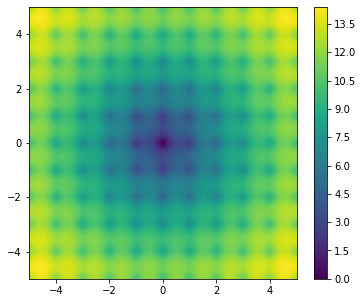

In [6]:
plot()

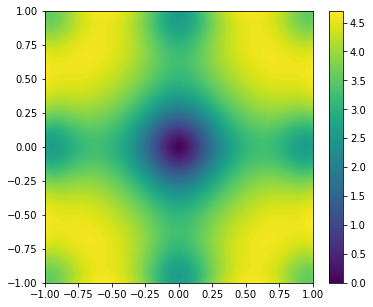

In [7]:
plot(1)

In [8]:
def initialPopulation(r,n):
    return [ (random.uniform(-r,r), random.uniform(-r,r)) for i in range(n) ]

[(0.39009675460664206, 0.31928114520981765),
 (0.12051906194175532, 0.8021400782545747),
 (0.10497970272712376, -0.1348954321589424),
 (0.28766209779526286, -0.0544848237007467),
 (0.880588530095759, 0.5975672208731964),
 (-0.12798068718253597, -0.07687955440651995),
 (0.6073068119588014, 0.645544833486366),
 (-0.31877464743995776, 0.9428503527894623),
 (0.6031590761572396, 0.838870839251888),
 (0.1075194307210745, -0.46109677477954314)]

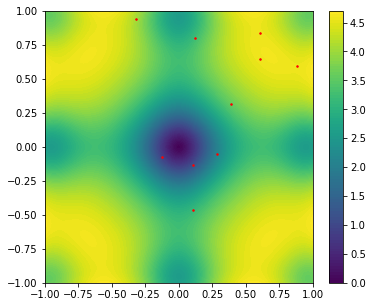

In [9]:
p=initialPopulation(1,10)

plot(1, population=p)
p

# Selection

Selection for mating is a random process that yields two parents from the current population. Parents are selected with a probability that is proportional to the normalised fitness.

In [10]:
def selectParents(population):
    fitness = [ f(p[0], p[1]) for p in population ]
    upb=math.ceil(max(fitness))
    lwb=math.floor(min(fitness))
    posf = [ upb-f for f in fitness ]
    A = B = (0,0)
    while A==B:
        A, B = random.choices(population, weights=posf, k=2)
    return (A, B)

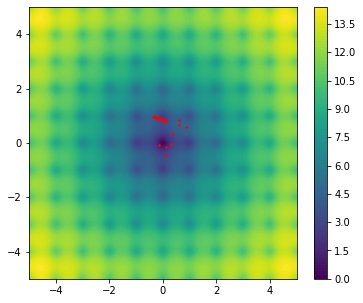

In [11]:
plot(R, population=p, parents=selectParents(p))

## Iterative Design

In [12]:
fitness = [ f(i[0], i[1]) for i in p ]
fitness

[3.543603692462713,
 3.1966423660151975,
 1.1291160500955666,
 2.1050441889044245,
 4.555024761076095,
 0.9334785703718755,
 4.5756771725594305,
 4.048963847917955,
 4.562279029745938,
 3.1041883673305013]

In [13]:
max(fitness)

4.5756771725594305

In [14]:
upb=math.ceil(max(fitness))
upb

5

In [15]:
min(fitness)

0.9334785703718755

In [16]:
lwb=math.floor(min(fitness))
lwb

0

In [17]:
posf = [ upb-f for f in fitness ]
posf

[1.456396307537287,
 1.8033576339848025,
 3.8708839499044334,
 2.8949558110955755,
 0.444975238923905,
 4.066521429628125,
 0.4243228274405695,
 0.951036152082045,
 0.43772097025406165,
 1.8958116326694987]

The build-in function random.choices returns two elements of the given population using the given weight distribution. However the elements can be equal. The loop structure is just ensuring that A!=B

In [18]:
A = B = (0,0)
while A==B:
    A, B = random.choices(p, weights=posf, k=2)
A, B

((0.10497970272712376, -0.1348954321589424),
 (0.1075194307210745, -0.46109677477954314))

# Genetics

We assume that all genetic information of an individuum is encoded in chromosomes. Different types of genetic algorithms correspond to different representations of chromosomes. There is a mapping `chromosome(Ind)` that maps an individuum `Ind` to the representation of its genetic information. There is a reverse mapping `incarnation(X)` that constructs an individuum from the given genetic information represented in their chromosomes `X`. Note that for every chromosome $X$:  chromosome(incarnation(X))=X. The inverse may or may not be valid, as an individuum may be shaped by other factors beyond the chromosomes.

In this example we assume a continous 2-dimensional encoding. The Chromosome is encoded as a pair of real numbers in the range 0..1.

In [19]:
def chromosome(ind):
    return (ind[0]+R)/(2*R), (ind[1]+R)/(2*R)

def incarnation(X):
    return (X[0]*2*R-R, X[1]*2*R-R)

# Cross-Over

Cross over is a random process by which the genetic information of two parents is split-up and mixed into the genetic information of two children.

In this particular case the crossover is simply defined as taking the first part form parent A and the second part from parent B and vice versa.

In [20]:
def crossover(A, B):
    return (A[0], B[1]), (B[0], A[1])

# Mutation

In [21]:
def mutate(X, p):
    u = random.random()
    if u<=p:
        return random.random(), random.random()
    else:
        return X

# Simulation

In [22]:
def addToPopulation(population, X, Y):
    
    def insert(population, X):
        for x in population:
            if x==X:
                return population
        return population+[X]
    
    n = len(population)
    population = insert(insert(population, X), Y)
    # if len(population)==n:
    #     print("!", end='')
    return sorted(population, key=lambda p: f(p[0], p[1]))[0:n]

In [23]:
def GA(size, 
       mutationRate=0.01, 
       generations=20, 
       logging=True,
       plotting=True):
    population = initialPopulation(R,size)
    fitness = [ f(p[0], p[1]) for p in population ]
    minimum = [ min(fitness) ]
    for gen in range(generations):
        if logging and gen%50==0:
            print(f"Generation: {gen:3d} min: {minimum[-1]:7.4f}")
        A, B = selectParents(population)
        AA = chromosome(A)
        BB = chromosome(B)
        X, Y = crossover(AA, BB)
        C = incarnation(mutate(X, mutationRate))
        D = incarnation(mutate(Y, mutationRate))
        population = addToPopulation(population, C, D)
        fitness = [ f(p[0], p[1]) for p in population ]
        minimum.append(min(fitness))
        
        if plotting and gen%50==0:
            plot(R, 
                 population=population, 
                 title=f"Generation {gen:3d} min= {minimum[-1]:7.4f}")

    return minimum

## Simulation Run with Plotting

Generation:   0 min:  2.8973
Generation:  50 min:  1.1788
Generation: 100 min:  0.8709
Generation: 150 min:  0.8709
Generation: 200 min:  0.8709
Generation: 250 min:  0.8709
Generation: 300 min:  0.8709
Generation: 350 min:  0.8709
Generation: 400 min:  0.8709
Generation: 450 min:  0.8709
Generation: 500 min:  0.8709
Generation: 550 min:  0.8709
Generation: 600 min:  0.8709
Generation: 650 min:  0.8709
Generation: 700 min:  0.8709
Generation: 750 min:  0.8709
Generation: 800 min:  0.8709
Generation: 850 min:  0.8709
Generation: 900 min:  0.8709
Generation: 950 min:  0.8709


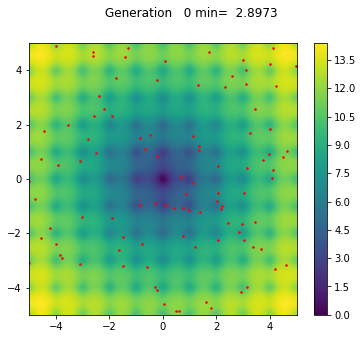

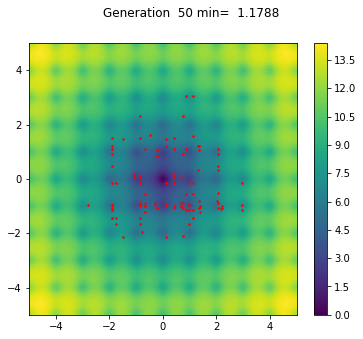

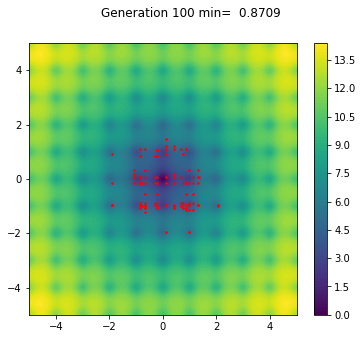

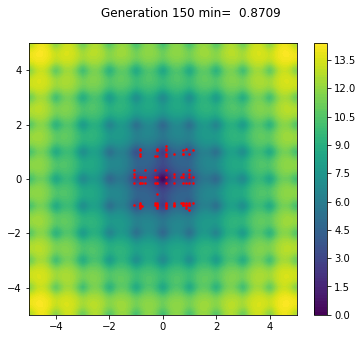

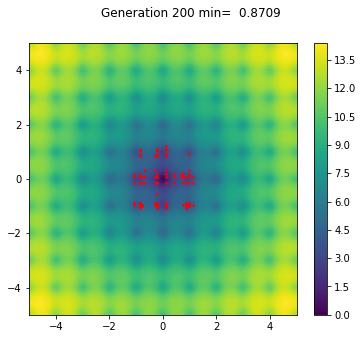

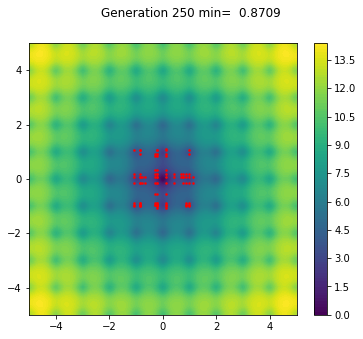

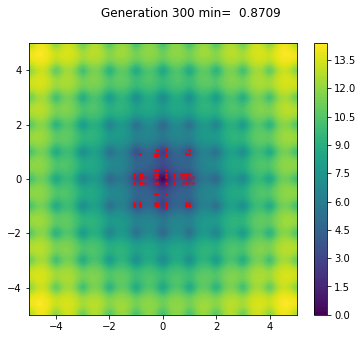

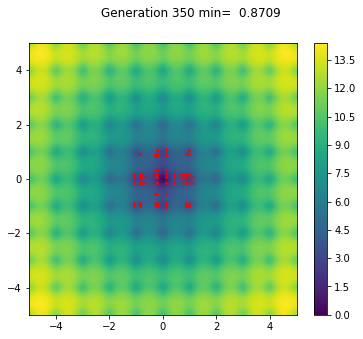

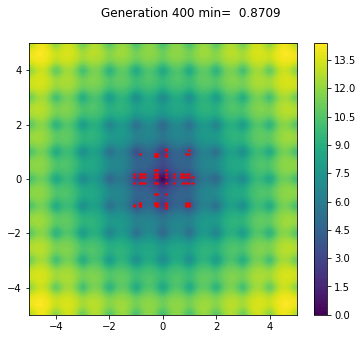

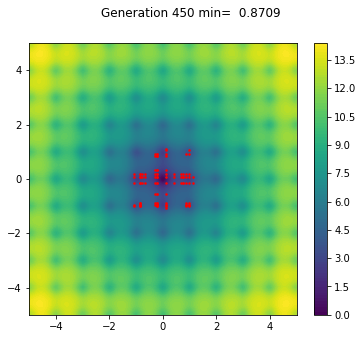

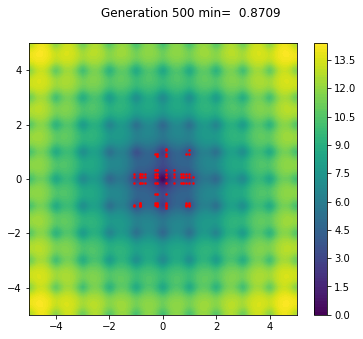

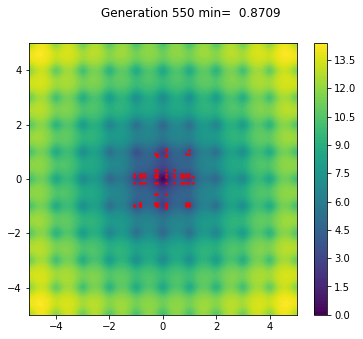

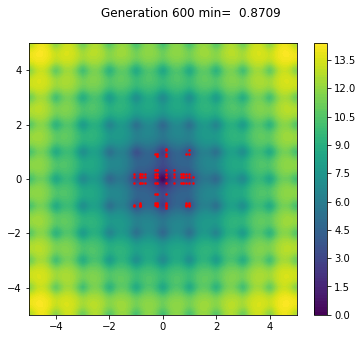

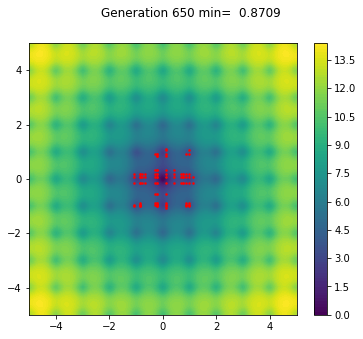

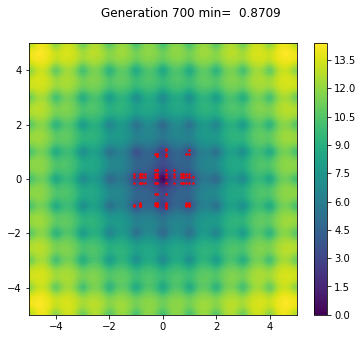

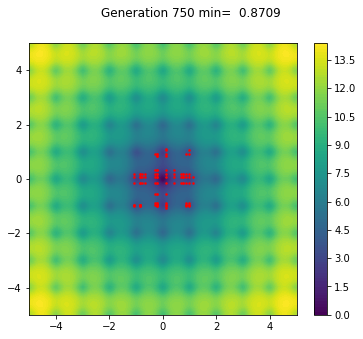

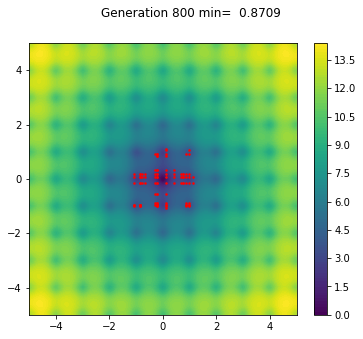

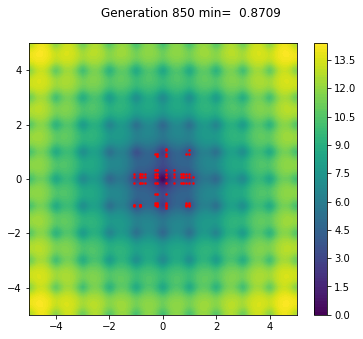

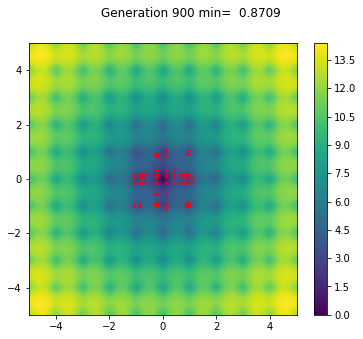

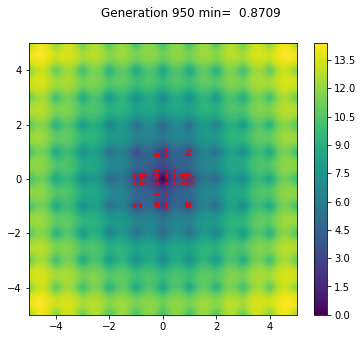

In [24]:
random.seed(0)
result=GA(100, mutationRate=0.01, generations=1000)

Generation:   0 min:  2.8973
Generation:  50 min:  1.7330
Generation: 100 min:  1.7330
Generation: 150 min:  1.1227
Generation: 200 min:  0.5335
Generation: 250 min:  0.5335
Generation: 300 min:  0.5335
Generation: 350 min:  0.5335
Generation: 400 min:  0.5335
Generation: 450 min:  0.5335
Generation: 500 min:  0.5335
Generation: 550 min:  0.5335
Generation: 600 min:  0.5324
Generation: 650 min:  0.5324
Generation: 700 min:  0.3927
Generation: 750 min:  0.3927
Generation: 800 min:  0.3927
Generation: 850 min:  0.3927
Generation: 900 min:  0.3927
Generation: 950 min:  0.3927


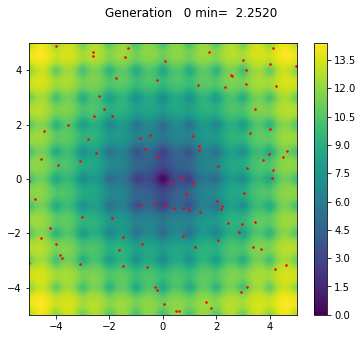

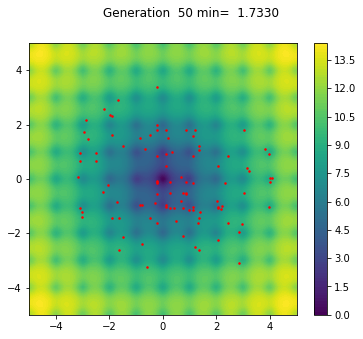

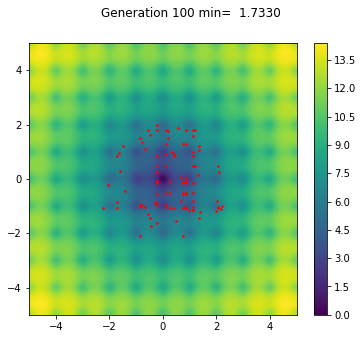

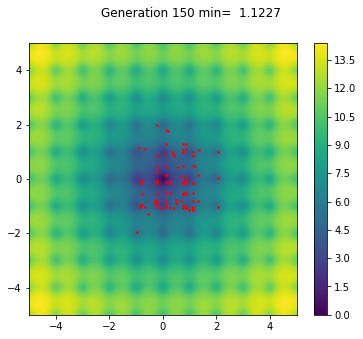

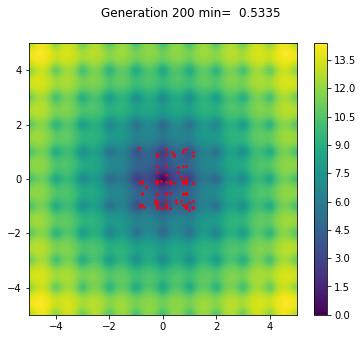

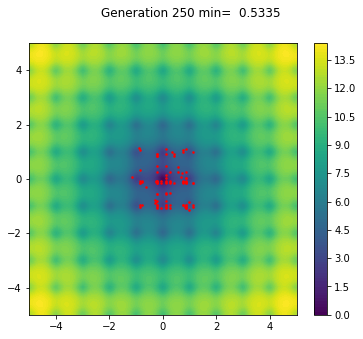

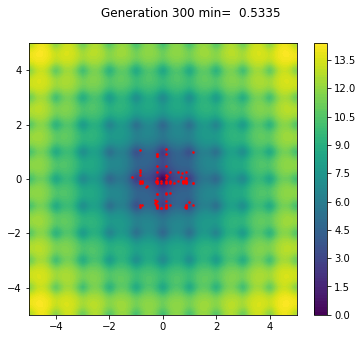

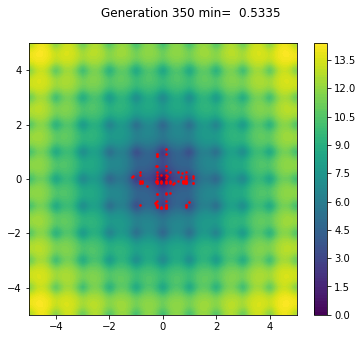

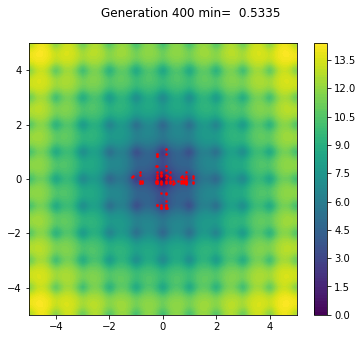

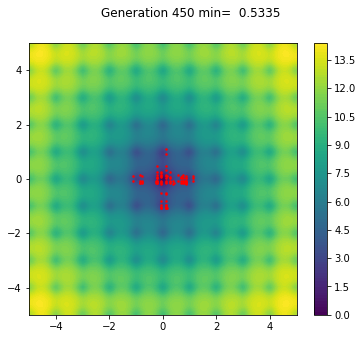

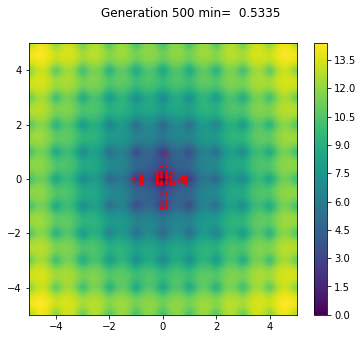

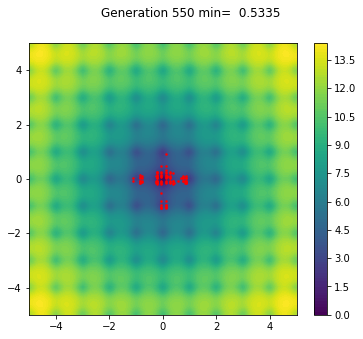

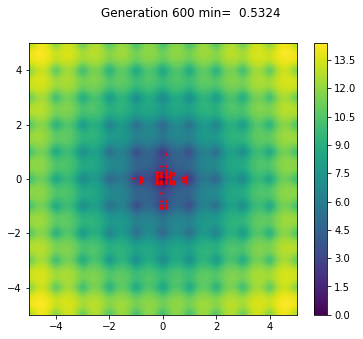

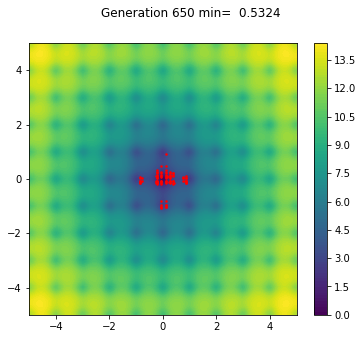

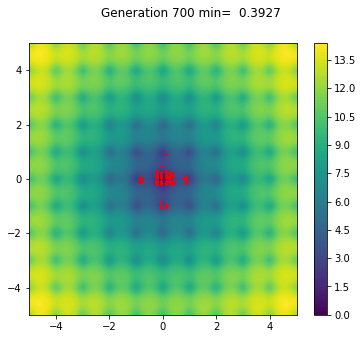

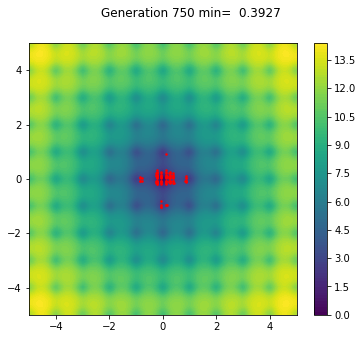

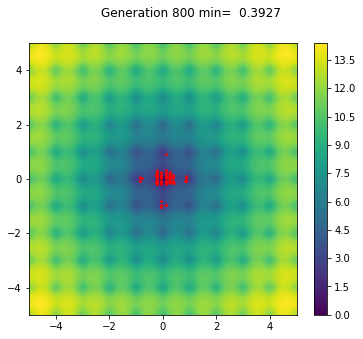

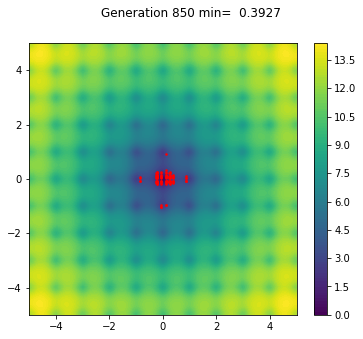

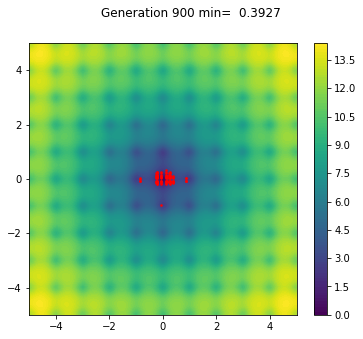

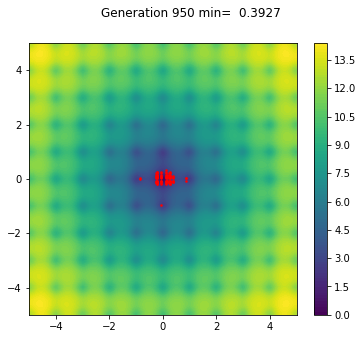

In [27]:
random.seed(0)
result=GA(100, mutationRate=0.6, generations=1000)

## Multiple Simulation Runs with Statistical Evaluation

In [ ]:
import pandas as pd
random.seed(1)
df=pd.DataFrame()
experiments=50
populationSize=100
for i in range(experiments):
    result=GA(populationSize, generations=1000, logging=False, plotting=False)
    # print(f"Exp{i:03d} min={result[-1]:7.4f}")
    df[f"Exp{i:03d}"]=pd.Series(result).values
df['Generation'] = np.arange(len(df))
df['Avg Min'] = df.iloc[:,0:experiments].mean(axis=1)
df['stdev'] = df.iloc[:,0:experiments].std(axis=1)
df['Avg Min + Std Dev'] = df['Avg Min']+df['stdev']
df['Avg Min - Std Dev'] = df['Avg Min']-df['stdev']

In [ ]:
df.head()

In [ ]:
df['Avg Min'].tail()

In [ ]:
df.stdev.tail()

In [ ]:
ax=df.plot(kind='line', x='Generation', y='Avg Min',
           title='Continuous GA Performance for 2-dimensional Ackley Function',
           figsize=(10,5))
ax=df.plot(kind='line', x='Generation', y='Avg Min + Std Dev',  ax=ax)
ax=df.plot(kind='line', x='Generation', y='Avg Min - Std Dev',  ax=ax)
plt.grid(True)

# Documentation

- [Python](https://docs.python.org/3/)
- [math](https://docs.python.org/3.8/library/math.html)
- [sorted](https://docs.python.org/3/library/functions.html#sorted)
- [random](https://docs.python.org/3/library/random.html)
- [f-strings](https://www.python.org/dev/peps/pep-0498/) 
  [%-strings](https://docs.python.org/3/library/stdtypes.html#printf-style-string-formatting)